<a href="https://colab.research.google.com/github/SanskritiSahu15/Machine_Learning/blob/main/Sustainable_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('/content/yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [ ]:
df.shape

(28242, 8)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
#droping the column unnamed column
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
# Assuming df is your DataFrame
unique_area_count = df['Area'].nunique()
unique_item_count = df['Item'].nunique()

print("Number of Unique Areas:", unique_area_count)
print("Number of Unique Items:", unique_item_count)

Number of Unique Areas: 101
Number of Unique Items: 10


There are 101 unique areas and 10 unique items in the dataset out of 28242.

In [ ]:
#checking for the null values
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
#checking for the whitespaces
whitespace_counts = df.apply(lambda x: x.str.isspace().sum() if x.dtype == "object" else 0)
print(whitespace_counts)

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [ ]:
#Encoding the categorical values to numerical values
# The LabelEncoder assigns a unique integer value to each unique categorical value in a column.
datacorr=df.copy()

categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

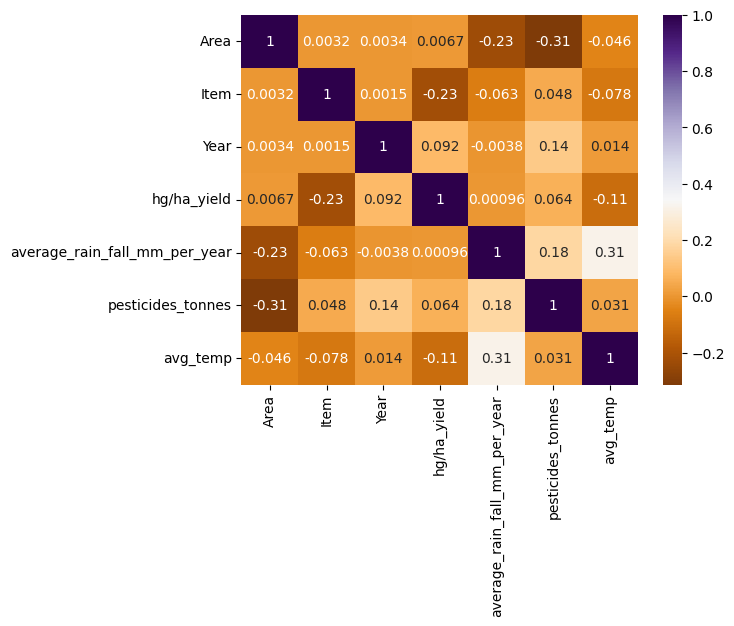

In [ ]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

Area: There's a strong correlation between Area and pesticides_tonnes, along with Area and average rainfall.


Items: There's a strong correlation between Item and hg/ha_yield.

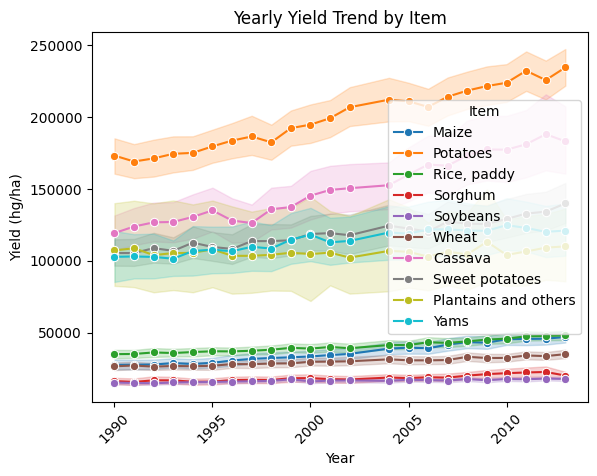

In [ ]:

# Line plot: Yearly Yield Trend per Item
sns.lineplot(x='Year', y='hg/ha_yield', hue='Item', data=df, marker='o')
plt.title('Yearly Yield Trend by Item')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.xticks(rotation=45)
plt.show()


The plot shows how the yields of each crop item have changed over the years.


Potatoes have the highest yield.


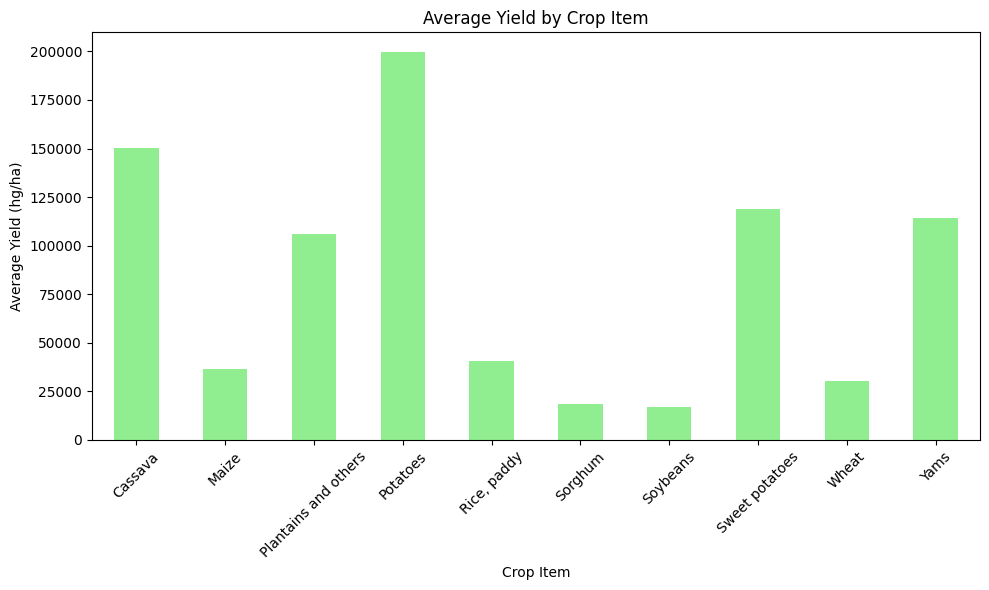

In [ ]:
avg_yield_by_item = df.groupby('Item')['hg/ha_yield'].mean()

# Creating the bar plot
plt.figure(figsize=(10, 6))
avg_yield_by_item.plot(kind='bar', color='lightgreen')
plt.title('Average Yield by Crop Item')
plt.xlabel('Crop Item')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

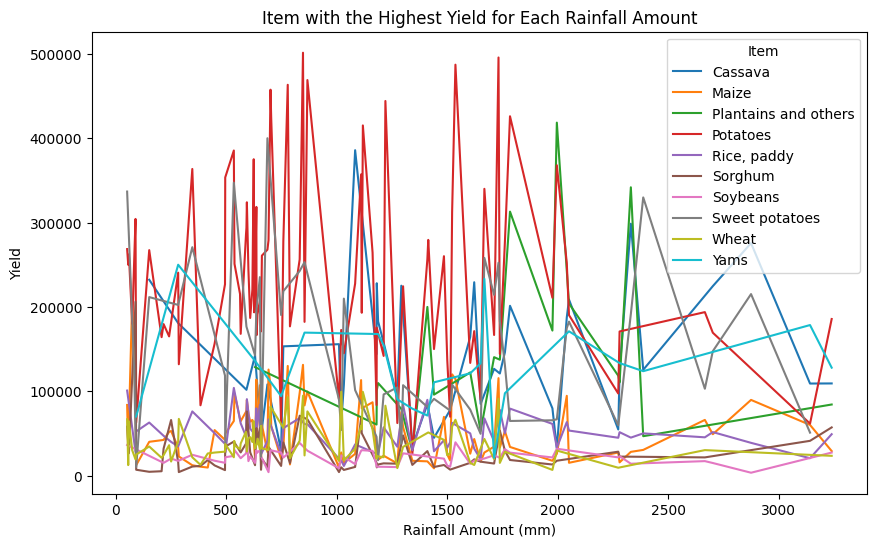

In [ ]:
# Group by 'Item' and 'average_rain_fall_mm_per_year', and calculate the maximum yield for each group
max_yield_df = df.groupby(['Item', 'average_rain_fall_mm_per_year'])['hg/ha_yield'].max().reset_index()

# Plot the item with the highest yield for each rainfall amount
plt.figure(figsize=(10,6))
sns.lineplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item', data=max_yield_df)
plt.title('Item with the Highest Yield for Each Rainfall Amount')
plt.xlabel('Rainfall Amount (mm)')
plt.ylabel('Yield')
plt.show()

Data Exploration


In [ ]:
df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


India has the highest yield production in the dataset. Inclusing items in the groupby:

In [ ]:
df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Data Preprocessing

In [ ]:
df_onehot = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield']
label=df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
features = features.drop(['Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB


Scaling Features:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)


In [ ]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score
def compare_models(model):
     model_name = model.__class__.__name__
     fit=model.fit(train_data,train_labels)
     y_pred=fit.predict(test_data)
     r2=r2_score(test_labels,y_pred)
     return([model_name,r2])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
 GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
 RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
 svm.SVR(),
 DecisionTreeRegressor()
 ]

In [ ]:
model_train=list(map(compare_models,models))

In [ ]:
 print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8959545600619471]
['RandomForestRegressor', 0.6807690552605921]
['SVR', -0.19466686625412555]
['DecisionTreeRegressor', 0.9602081125263321]


The evaluation metric is set based on R^2 (coefficient of determination) regression score function, that will represents the proportion of the variance for items (crops) in the regression model. R^2 score shows how well terms (data points) fit a curve or line.

R^2 is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance.

From results viewd above, Decision Tree Regressor has the highest R^2 score 0f 96%, GradientBoostingRegressor comes second.

I'll also calculate Adjusted R^2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted R2 will always be less than or equal to R2.

In [ ]:
df_onehot = df_onehot.drop(['Year'], axis=1)

In [ ]:
df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,66667,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,23333,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12500,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,7000,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting

test_df=pd.DataFrame(test_data,columns=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield'].columns)

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [ ]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [ ]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


In [ ]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

,0
Item,
Cassava,0.934131
Maize,0.884684
Plantains and others,0.799092
Potatoes,0.905916
"Rice, paddy",0.890737
Sorghum,0.835526
Soybeans,0.805249
Sweet potatoes,0.867575
Wheat,0.926605


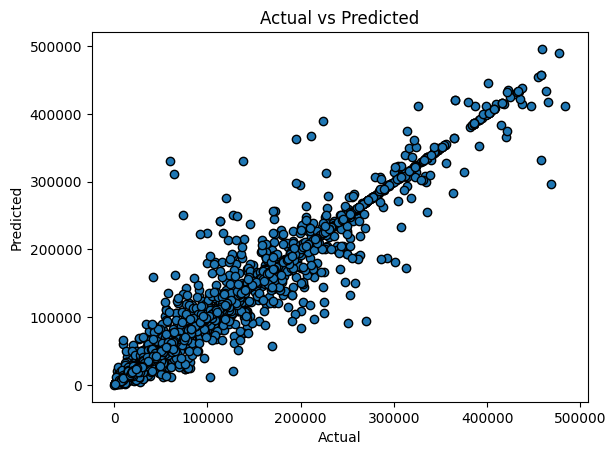

In [ ]:
# So let's run the model actual values against the predicted ones

fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

Model Results & Conclusions

In [ ]:
varimp= {'imp':model.feature_importances_,'names':df_onehot.columns[df_onehot.columns!="hg/ha_yield"]}

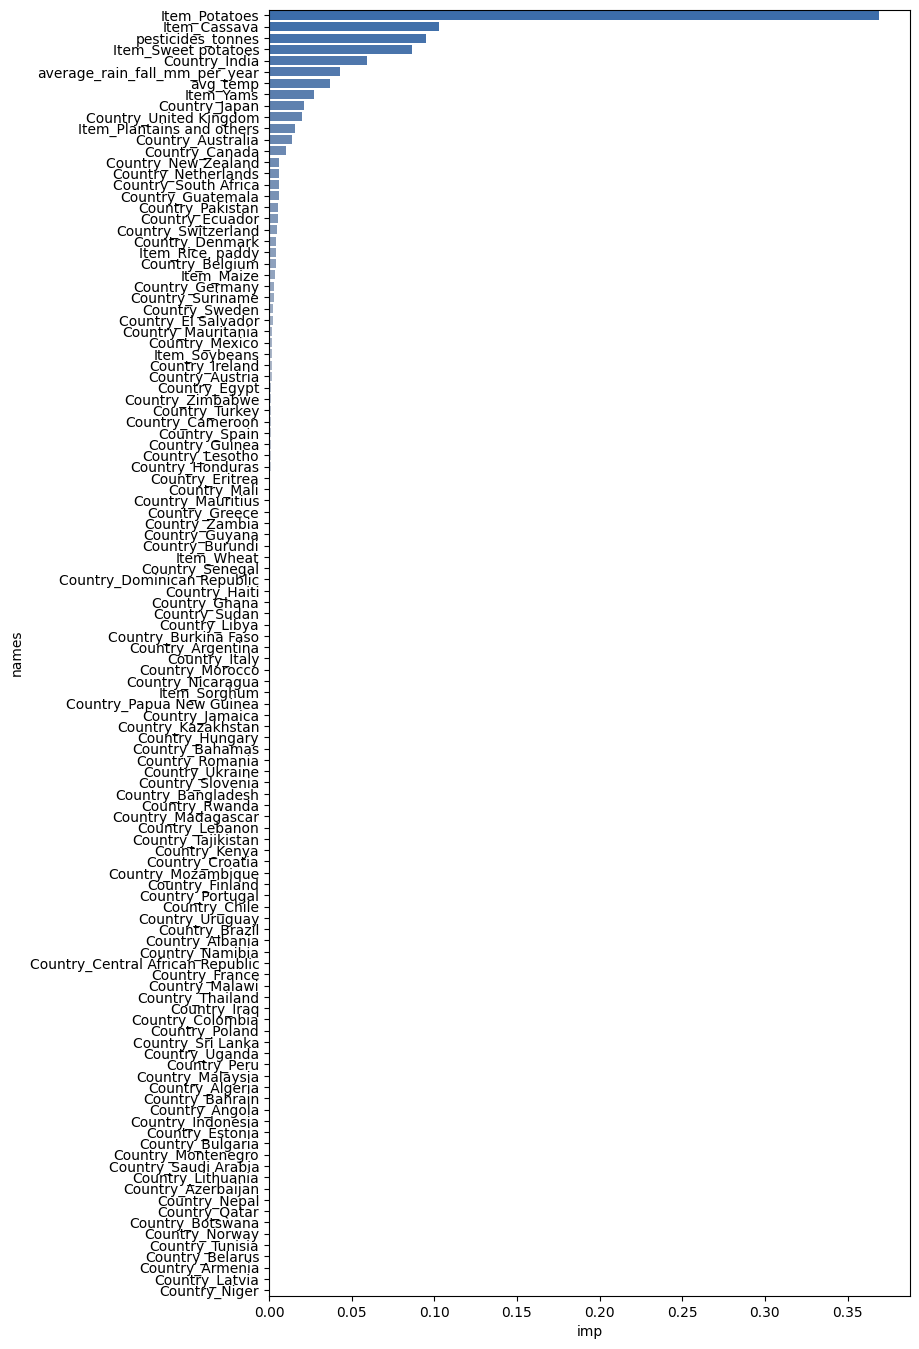

In [ ]:
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

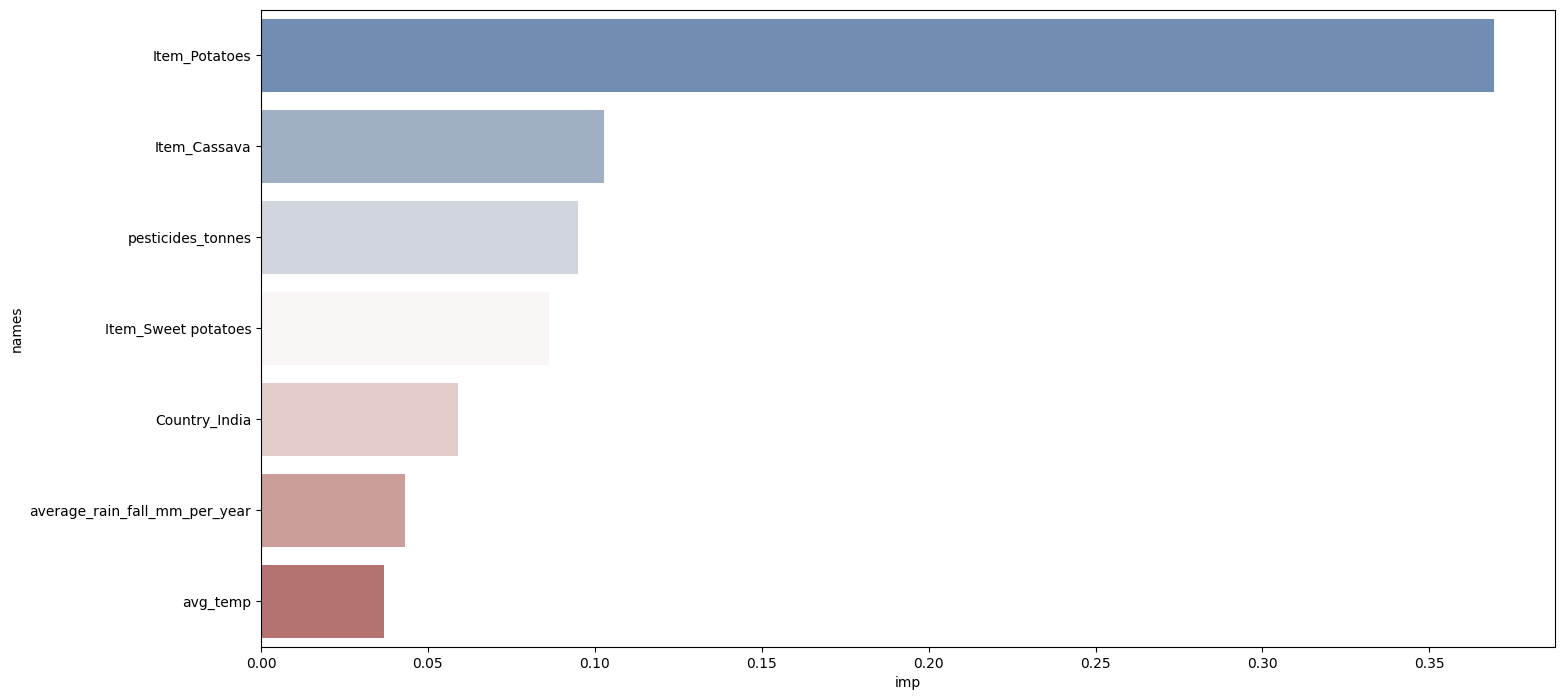

In [ ]:
#Getting only top 7 of features importance in the model:

#7 most important factors that affect crops
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset.

If the crop is grown in India, makes sense since India has the largest crops sum in the dataset. Then comes rainfall and temprature. The first assumption about these features were correct, where they all significanally impact the expected crops yield in the model.